<a href="https://colab.research.google.com/github/jiwon5315/BusinessAnalystPortfolio/blob/main/PredictiveAnalytics/Obesity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset Overview**
- Dataset: Obesity.txt
- Purpose: Predict people's stage of diabetes
- Number of observations: 2111

- Number of predictor variables: 16
- Categorical variables (8): gender, family history, favc, caec, smoke, scc, calc, mtrans
- Quantitative variables (8): age, height, weight, fcvc, ncp, ch20, faf, tue

STEP 1: Load 'obesity' dataset and R package libraries

In [ ]:
install.packages("car")
install.packages("caret")
install.packages("class")
install.packages("tree")
install.packages("rpart")
install.packages("rpart.plot")
install.packages("randomForest")
install.packages("party")
install.packages("FNN")
install.packages("ggplot2")
install.packages("pdp")
library(car)
library(caret)
library(class)
library(tree)
library(rpart)
library(rpart.plot)
library(randomForest)
library(party)
library(FNN)
library(ggplot2)
library(pdp)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



STEP 2: Factor categorical variables

In [ ]:
obesity <- read.table('Obesity.txt',header=TRUE)
factor_variables <- c("Gender","family_history_with_overweight", "FAVC","CAEC",
                      "SMOKE","SCC","CALC","MTRANS")
for (x in factor_variables) {
  obesity[[x]] <- as.factor(obesity[[x]])
}
obesity$NObeyesdad <- factor(obesity$NObeyesdad, level=c("Insufficient_Weight","Normal_Weight",
                        "Overweight_Level_I","Overweight_Level_II","Obesity_Type_I",
                        "Obesity_Type_II","Obesity_Type_III"))

STEP 3: Rename column names and create dummy variables

In [ ]:
colnames(obesity) <- c("Gender","Age","Height","Weight","Fam_History","Diet_HighCal",
                       "Diet_Veg","Num_Meals","Snacks","Smoke","Water","Monitor",
                       "Exercise","Tech","Alcohol","Transportation","Diabetic")

STEP 4: Partition data into train and test sets (75%-25%)

In [ ]:
set.seed(50)
train_index <- createDataPartition(obesity$Diabetic,p=.75,list = F)
data_train <- obesity[ train_index,] #1586 rows
data_test <- obesity[-train_index,] #525 rows

STEP 5: PreProcess

In [ ]:
#--Since the outcome variable is categorical, predictors were not separated
preprocess_params <- preProcess(data_train, method = c("knnImpute","center", "scale"))
train_pred <- data_train[,-17]
test_pred <- data_test[,-17]
train_outcome <- data_train$Diabetic
test_outcome <- data_test$Diabetic
trainP_normalized <- predict(preprocess_params, train_pred)
testP_normalized <- predict(preprocess_params, test_pred)
train_normalized <- data.frame(trainP_normalized,data_train$Diabetic)
test_normalized <- data.frame(testP_normalized,data_test$Diabetic)

STEP 6: Cross Validation

In [ ]:
ctrl=trainControl(method = "repeatedcv", number = 10, repeats=5)

STEP 7: Build Models

Confusion Matrix and Statistics

                     Reference
Prediction            Insufficient_Weight Normal_Weight Overweight_Level_I
  Insufficient_Weight                  67            35                  2
  Normal_Weight                         0             0                  0
  Overweight_Level_I                    0             0                  0
  Overweight_Level_II                   1            36                 70
  Obesity_Type_I                        0             0                  0
  Obesity_Type_II                       0             0                  0
  Obesity_Type_III                      0             0                  0
                     Reference
Prediction            Overweight_Level_II Obesity_Type_I Obesity_Type_II
  Insufficient_Weight                   0              0               0
  Normal_Weight                         0              0               0
  Overweight_Level_I                    0              0               0
  Overweight_

,Overall
,<dbl>
Age,118.45952
Diet_Veg,290.44129
Fam_History,108.60182
Gender,288.23550
Height,89.22124
Num_Meals,31.93312
Snacks,103.47505
Weight,380.62488
Diet_HighCal,0.00000


3-nearest neighbor model
Training set outcome distribution:

Insufficient_Weight       Normal_Weight  Overweight_Level_I Overweight_Level_II 
                204                 216                 218                 218 
     Obesity_Type_I     Obesity_Type_II    Obesity_Type_III 
                264                 223                 243 


Confusion Matrix and Statistics

                     Reference
Prediction            Insufficient_Weight Normal_Weight Overweight_Level_I
  Insufficient_Weight                  67            16                  2
  Normal_Weight                         0            25                  4
  Overweight_Level_I                    1            21                 52
  Overweight_Level_II                   0             6                  4
  Obesity_Type_I                        0             3                 10
  Obesity_Type_II                       0             0                  0
  Obesity_Type_III                      0             0                  0
                     Reference
Prediction            Overweight_Level_II Obesity_Type_I Obesity_Type_II
  Insufficient_Weight                   1              0               0
  Normal_Weight                         3              1               0
  Overweight_Level_I                    1              2               0
  Overweight_

ROC curve variable importance

  variables are sorted by maximum importance across the classes
               Insufficient_Weight Normal_Weight Overweight_Level_I
Weight                      98.279        99.870            100.000
Age                         39.269        63.363             55.622
Diet_Veg                    27.501        28.534             37.375
Gender                      14.938        29.352             21.990
Fam_History                 25.427        48.676             51.487
Height                       5.997        10.790              6.060
Snacks                      36.422        42.032             42.966
Alcohol                     18.995         4.739              6.408
Num_Meals                   23.966        35.087             39.279
Exercise                     4.137        15.654             13.142
Water                       20.755        10.081             23.654
Tech                        18.669         9.457             11.166
Diet_HighCal         

Bagged CART 

1586 samples
  16 predictor
   7 classes: 'Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 1427, 1427, 1429, 1428, 1427, 1428, ... 
Resampling results:

  Accuracy   Kappa   
  0.9550027  0.947439


,parameter,Accuracy,Kappa,AccuracySD,KappaSD
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,none,0.9550027,0.947439,0.01664945,0.01944926


treebag variable importance

                Overall
Weight         100.0000
Height          76.4746
Diet_Veg        52.1704
Age             46.8593
Gender          43.4931
Num_Meals       25.2031
Snacks          21.7788
Exercise        21.7170
Fam_History     19.5566
Water           13.3150
Tech            11.6955
Alcohol         10.7970
Transportation   7.3923
Diet_HighCal     6.7687
Monitor          0.5221
Smoke            0.0000

[1] 0.04571429


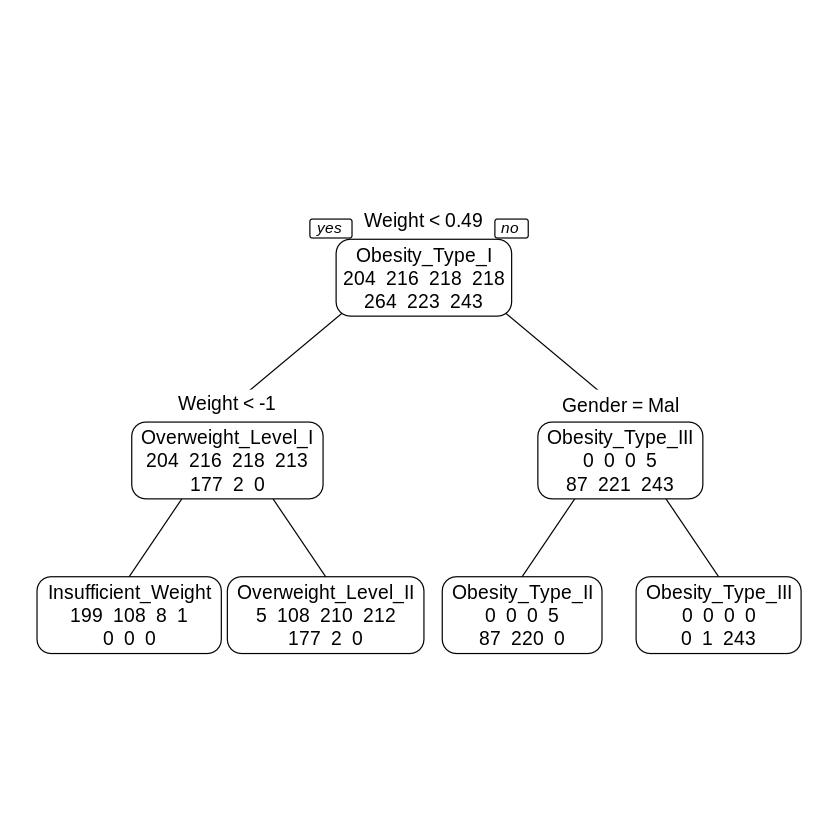

In [ ]:
##--Decision Tree (Accuracy: 0.5524, NIR: 0.1657, P-value: Significant)
#set.seed(5)
class.tree <- rpart(data_train.Diabetic ~., data=train_normalized, control=rpart.control(maxdepth=2),
                    method="class")

prp(class.tree,type=1,extra=1,split.font=1,varlen=-10)

###----Prune by lower cp
pruned.ct <- prune(class.tree, cp = class.tree$cptable[which.min(class.tree$cptable[,"xerror"]),"CP"])
prp(pruned.ct, type=1, extra=1, split.font=1, varlen=-10)
pruned_pred_test <- predict(pruned.ct, test_normalized[,-17], type="class")
confusionMatrix(pruned_pred_test,test_normalized$data_test.Diabetic)

###----Variable Importance plot
varImp(pruned.ct)

##--KNN Model (Accuracy: 0.8324, NIR: 0.1657, P-value: Significant)
#set.seed(3)
knnModel <- train(
  data_train.Diabetic ~ .,
  data = train_normalized,
  method = "knn",
  trControl = ctrl,
  tuneGrid = data.frame(k = c(3,5,7,10))
)

knnModel$finalModel #best k=3

best_knnModel <- train(
  data_train.Diabetic ~ .,
  data = train_normalized,
  method = "knn",
  trControl = ctrl,
  tuneGrid = data.frame(k = c(3))
)

knn_pred_test <- predict(best_knnModel, test_normalized[,-17])
confusionMatrix(knn_pred_test,test_normalized$data_test.Diabetic)

###----Variable Importance plot
varImp(best_knnModel)

##--Bagged Decision Tree (Accuracy: 0.9584905, NIR: 0.1657, P-value: Significant)
#set.seed(123)
cv.bagged.tree=train(x=trainP_normalized,y=train_outcome,
                     method='treebag',trControl=ctrl)
cv.bagged.tree

pred.bagged.tree=predict(cv.bagged.tree, testP_normalized)

cv.bagged.tree$results
conf_matrix <- confusionMatrix(data=pred.bagged.tree,test_outcome)

###----Variable Importance plot
varImp(cv.bagged.tree)

###----Misclassification Rate
# Extract elements from the confusion matrix
conf_matrix_table <- conf_matrix$table
total <- sum(conf_matrix_table)

# Calculate misclassification rate for a 7-class problem
misclassification_rate <- (total - sum(diag(conf_matrix_table))) / total

# Print misclassification rate
print(misclassification_rate)

STEP 8: Partial Dependence Plots

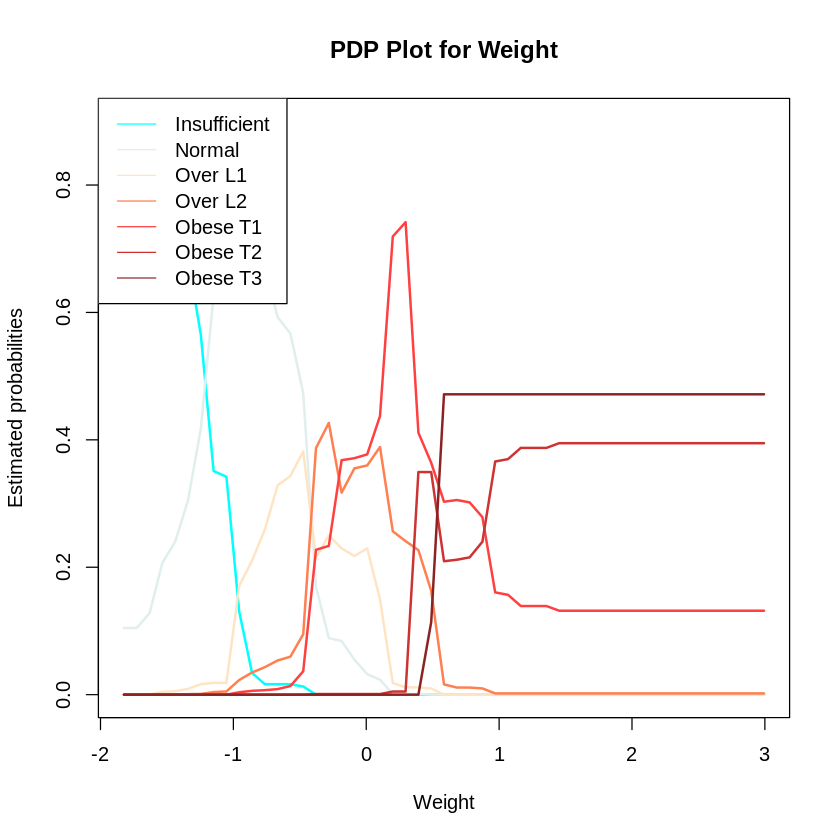

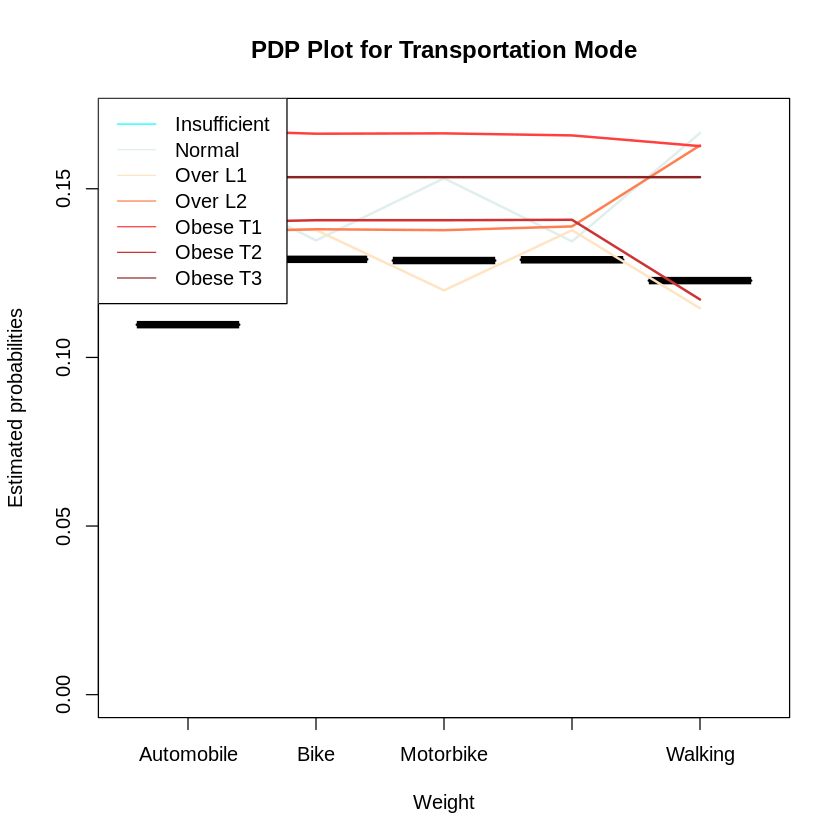

In [ ]:
pred.prob.insufficient <- function(object, newdata) {
  pred<-predict(object,newdata,type="prob")
  prob.insufficient=pred[,1]
  mean(prob.insufficient)
}

pred.prob.normal <- function(object, newdata) {
  pred<-predict(object,newdata,type="prob")
  prob.normal=pred[,2]
  mean(prob.normal)
}

pred.prob.overL1 <- function(object, newdata) {
  pred<-predict(object,newdata,type="prob")
  prob.overL1=pred[,3]
  mean(prob.overL1)
}

pred.prob.overL2 <- function(object, newdata) {
  pred<-predict(object,newdata,type="prob")
  prob.overL2=pred[,4]
  mean(prob.overL2)
}

pred.prob.obT1 <- function(object, newdata) {
  pred<-predict(object,newdata,type="prob")
  prob.obT1=pred[,5]
  mean(prob.obT1)
}

pred.prob.obT2 <- function(object, newdata) {
  pred<-predict(object,newdata,type="prob")
  prob.obT2=pred[,6]
  mean(prob.obT2)
}

pred.prob.obT3 <- function(object, newdata) {
  pred<-predict(object,newdata,type="prob")
  prob.obT3=pred[,7]
  mean(prob.obT3)
}

###----Weight
library(pdp)
library(ggplot2)
pdp.insuf.weight <- partial(cv.bagged.tree, pred.var = c("Weight"),
                          pred.fun = pred.prob.insufficient, plot = FALSE)
pdp.norm.weight <- partial(cv.bagged.tree, pred.var = c("Weight"),
                          pred.fun = pred.prob.normal, plot = FALSE)
pdp.overL1.weight <- partial(cv.bagged.tree, pred.var = c("Weight"),
                          pred.fun = pred.prob.overL1, plot = FALSE)
pdp.overL2.weight <- partial(cv.bagged.tree, pred.var = c("Weight"),
                             pred.fun = pred.prob.overL2, plot = FALSE)
pdp.obT1.weight <- partial(cv.bagged.tree, pred.var = c("Weight"),
                             pred.fun = pred.prob.obT1, plot = FALSE)
pdp.obT2.weight <- partial(cv.bagged.tree, pred.var = c("Weight"),
                             pred.fun = pred.prob.obT2, plot = FALSE)
pdp.obT3.weight <- partial(cv.bagged.tree, pred.var = c("Weight"),
                           pred.fun = pred.prob.obT3, plot = FALSE)

plot(pdp.insuf.weight$Weight,pdp.insuf.weight$yhat,"l",lwd=2,
     col="cyan",main="PDP Plot for Weight",xlab="Weight",ylab="Estimated probabilities",
     ylim=c(0,0.9))
lines(pdp.norm.weight$Weight,pdp.norm.weight$yhat,lwd=2,col="azure2")
lines(pdp.overL1.weight$Weight,pdp.overL1.weight$yhat,lwd=2,col="bisque")
lines(pdp.overL2.weight$Weight,pdp.overL2.weight$yhat,lwd=2,col="coral")
lines(pdp.obT1.weight$Weight,pdp.obT1.weight$yhat,lwd=2,col="brown1")
lines(pdp.obT2.weight$Weight,pdp.obT2.weight$yhat,lwd=2,col="brown3")
lines(pdp.obT3.weight$Weight,pdp.obT3.weight$yhat,lwd=2,col="brown4")
legend(x="topleft",c("Insufficient", "Normal","Over L1", "Over L2", "Obese T1", "Obese T2", "Obese T3"),
       lty=c(1,1,1),col=c("cyan","azure2","bisque","coral","brown1","brown3","brown4"))

###----Transportation
pdp.insuf.mtran <- partial(cv.bagged.tree, pred.var = c("Transportation"),
                            pred.fun = pred.prob.insufficient, plot = FALSE)
pdp.norm.mtran <- partial(cv.bagged.tree, pred.var = c("Transportation"),
                           pred.fun = pred.prob.normal, plot = FALSE)
pdp.overL1.mtran <- partial(cv.bagged.tree, pred.var = c("Transportation"),
                             pred.fun = pred.prob.overL1, plot = FALSE)
pdp.overL2.mtran <- partial(cv.bagged.tree, pred.var = c("Transportation"),
                             pred.fun = pred.prob.overL2, plot = FALSE)
pdp.obT1.mtran <- partial(cv.bagged.tree, pred.var = c("Transportation"),
                           pred.fun = pred.prob.obT1, plot = FALSE)
pdp.obT2.mtran <- partial(cv.bagged.tree, pred.var = c("Transportation"),
                           pred.fun = pred.prob.obT2, plot = FALSE)
pdp.obT3.mtran <- partial(cv.bagged.tree, pred.var = c("Transportation"),
                           pred.fun = pred.prob.obT3, plot = FALSE)

plot(pdp.insuf.mtran$Transportation,pdp.insuf.mtran$yhat,"l",lwd=2,
     col="cyan",main="PDP Plot for Transportation Mode",xlab="Weight",ylab="Estimated probabilities",
     ylim=c(0,0.17))
lines(pdp.norm.mtran$Transportation,pdp.norm.mtran$yhat,lwd=2,col="azure2")
lines(pdp.overL1.mtran$Transportation,pdp.overL1.mtran$yhat,lwd=2,col="bisque")
lines(pdp.overL2.mtran$Transportation,pdp.overL2.mtran$yhat,lwd=2,col="coral")
lines(pdp.obT1.mtran$Transportation,pdp.obT1.mtran$yhat,lwd=2,col="brown1")
lines(pdp.obT2.mtran$Transportation,pdp.obT2.mtran$yhat,lwd=2,col="brown3")
lines(pdp.obT3.mtran$Transportation,pdp.obT3.mtran$yhat,lwd=2,col="brown4")
legend(x="topleft",c("Insufficient", "Normal","Over L1", "Over L2", "Obese T1", "Obese T2", "Obese T3"),
       lty=c(1,1,1),col=c("cyan","azure2","bisque","coral","brown1","brown3","brown4"))

STEP 9: Interaction Plots for Normal Weight category

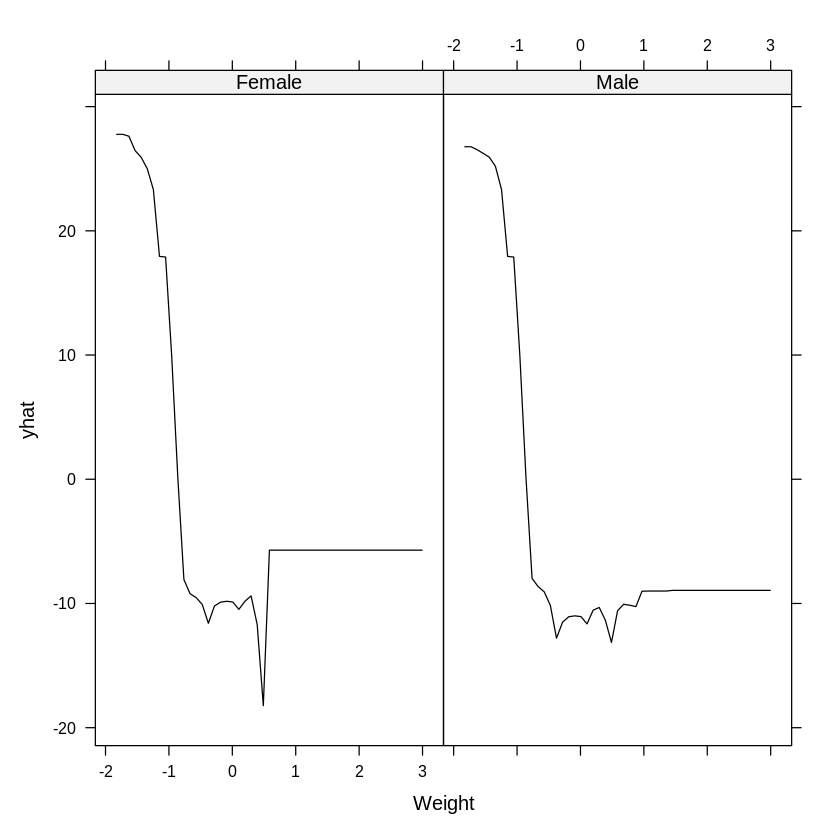

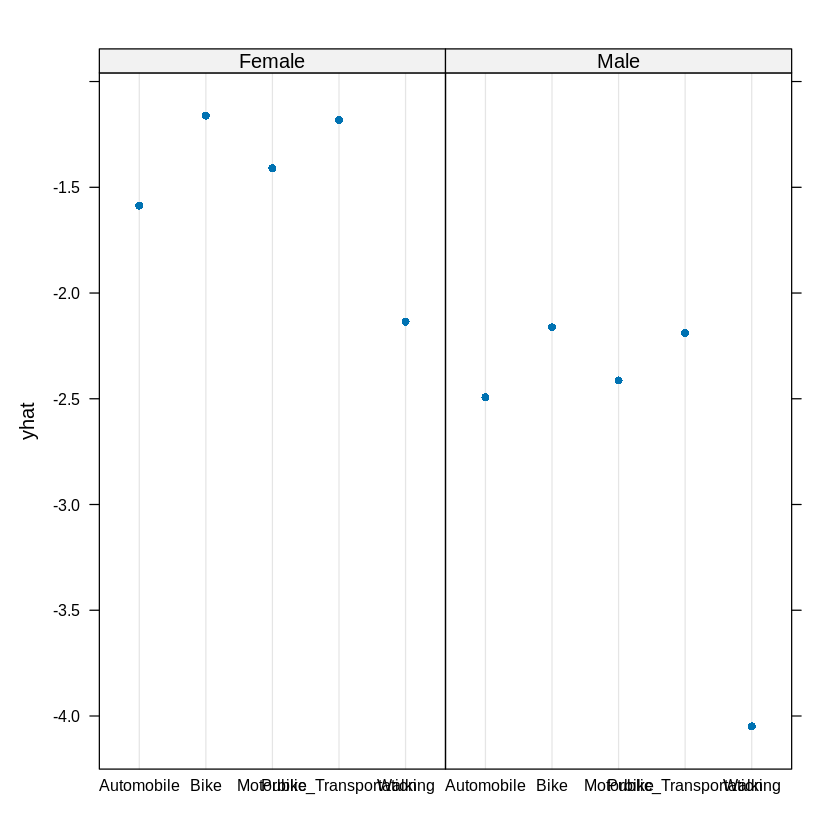

In [ ]:
###----Weight - Age
pdp.normal.weight_age <- partial(cv.bagged.tree, pred.var = c("Weight","Age"),
                    pred.bagged.tree = pred.prob.normal, plot = TRUE)
###----Weight - Gender
pdp.normal.weight_gender <- partial(cv.bagged.tree, pred.var = c("Weight","Gender"),
                                 pred.bagged.tree = pred.prob.normal, plot = TRUE)

pdp.normal.weight_gender
###----Transportation - Gender
pdp.normal.transportation_gender <- partial(cv.bagged.tree, pred.var = c("Transportation","Gender"),
                                    pred.bagged.tree = pred.prob.normal, plot = TRUE)
pdp.normal.transportation_gender

STEP 10: New Data - John

In [ ]:
newdata_john <- data.frame(Gender='Male',Age=31,Height=1.63,Weight=72,
                           Fam_History='yes',Diet_HighCal='yes',Diet_Veg=2,
                           Num_Meals=3,Snacks='Frequently',Smoke='yes',Water=2,
                           Monitor='no',Exercise=0,Tech=3,Alcohol='Frequently',
                           Transportation='Automobile')
###---PreProcess John's data
dataJohn_normalized <- predict(preprocess_params, newdata_john)
pred_john <- predict(cv.bagged.tree,dataJohn_normalized,type="prob")
print("Bagged Decision Tree Model Prediction")
pred_john
knn_john <- predict(best_knnModel, newdata_john, type="prob")
print("KNN Model Prediction")
knn_john
dt_john <- predict(pruned.ct, newdata_john, type="prob")
print("Decision Tree Model Prediction")
dt_john

[1] "Bagged Decision Tree Model Prediction"


Insufficient_Weight,Normal_Weight,Overweight_Level_I,Overweight_Level_II,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0.56,0.44,0,0,0,0


[1] "KNN Model Prediction"


Insufficient_Weight,Normal_Weight,Overweight_Level_I,Overweight_Level_II,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,0,0,1


[1] "Decision Tree Model Prediction"


,Insufficient_Weight,Normal_Weight,Overweight_Level_I,Overweight_Level_II,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III
1,0,0,0,0.01602564,0.2788462,0.7051282,0


**Conclusion**

There is a 56% probability that John is in the Normal_Weight category, but there’s also a 44% probability that he might be Overweight_Level_I. When sharing this information with John, we can let him know that the bagged trees model came to this conclusion as an aggregated combination of other decision tree models. We can share that weight, height, vegetable intake, age and gender were probably the biggest factors that impacted the results based on the Variable Importance factors.

However, this should come as a caution since our other models contradicted this result:
Our decision tree model predicted that John has 70.5% probability of being Obesity_Type_II and the KNN Model predicted him with Obesity_Type_III.
These models are not preferred since we have a high dimensional data and 1 decision tree models are notoriously prone to overfitting.